In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [4]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [5]:
criterion = nn.MSELoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Epoch: 1, loss = 5763.3306
Epoch: 4, loss = 5261.9717
Epoch: 5, loss = 5105.4580
Epoch: 16, loss = 3681.6587
Epoch: 17, loss = 3575.7075
Epoch: 20, loss = 3277.7085
Epoch: 21, loss = 3184.6421
Epoch: 32, loss = 2337.1260
Epoch: 33, loss = 2273.9858
Epoch: 36, loss = 2096.3367
Epoch: 37, loss = 2040.8369
Epoch: 48, loss = 1534.9448
Epoch: 49, loss = 1497.2173
Epoch: 52, loss = 1391.0358
Epoch: 53, loss = 1357.8531
Epoch: 64, loss = 1055.1343
Epoch: 65, loss = 1032.5385
Epoch: 68, loss = 968.9267
Epoch: 69, loss = 949.0424
Epoch: 80, loss = 767.5053
Epoch: 81, loss = 753.9442
Epoch: 84, loss = 715.7578
Epoch: 85, loss = 703.8181
Epoch: 96, loss = 594.7451
Epoch: 97, loss = 586.5915
Epoch: 100, loss = 563.6277


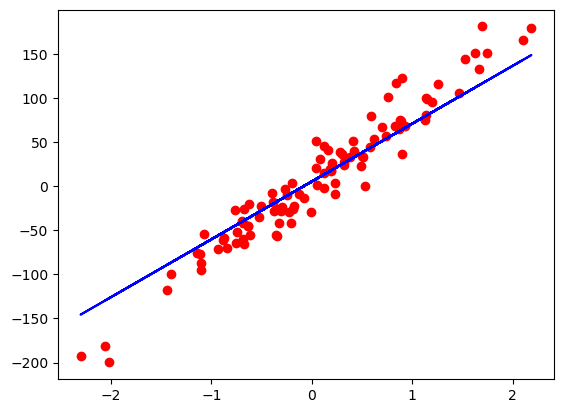

In [6]:
num_epochs = 100

for epoch in range(num_epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) & 10 == 0:
        print(f'Epoch: {epoch+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()